# ML Foreclosure Binary Classification - 5% sample dataset
Only "resolved" outcomes - Either paid off or default 

    target = zeroBalCode (set to object dtype) 
    Binary classification sets zeroBalCode to either "0" or "1" for the 7 possible outcomes
    
    "0" = "Loan Success"
        * 01 = Prepaid or Matured
        * 06 = Repurchased
        * 16 = Reperforming Loan Sale

    "1" =  "Loan Failure" - Most likely loss of money (but not necessarily) one of below conditions:
        * 02 = Third Party Sale
        * 03 = Short Sale
        * 09 = Deed-in-Lieu,REO
        * 15 = Note Sale


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#!pip install pycaret
from imblearn.over_sampling import RandomOverSampler
from pycaret.classification import *
#from pycaret.regression import *
pd.set_option('display.max_columns', None)


# Importing the data - don't use *.ML.csv files!!!
If you have *.MLReady.csv then [click here](#MLReady)

In [2]:
df=pd.read_csv("data/FM_Acq2_Perf_FMAC2_loanAge_sample5.csv")
df.head()

,Unnamed: 0,Unnamed: 0.1,id,origChannel,sellerName,origIntRate,origUPB,origLoanTerm,origDate,origLTV,origCLTV,numBorrowers,origDebtIncRatio,loanPurp,propState,zipCode,pMIperct,mortInsType,bestCreditScore,worstCreditScore,avgCreditScore,loanAge,monMatur,mSA,zeroBalCode,deliqGood,deliqBad,deliqMax,fmacRateMax,fmacRateMin,fmacRateAvg,fmacRateVolatility,fredRate,rateDiffAbove,rateDiffBelow,rateDiffAvg,rateDiffAbovePct,rateDiffBelowPct,rateDiffAvgPct
0,2008203,2008203,994088840298,B,OTHER,6.500,79000,360,2007-02-01,69.0,69.0,1.0,27.0,R,OH,447,0.0,0.0,633.0,633.0,633.0,77,283.0,15940,1.0,75,2,1.0,6.34,6.22,6.2850,0.019293,4.84,0.160,-0.280,0.2150,0.025237,-0.045016,0.034208
1,1174043,1174043,842724479742,C,"BANK OF AMERICA, N.A.",5.250,140000,360,2003-06-01,49.0,49.0,1.0,31.0,R,CA,956,0.0,0.0,673.0,673.0,673.0,15,345.0,40900,1.0,8,7,6.0,5.26,5.21,5.2300,0.009597,3.37,-0.010,-0.040,0.0200,-0.001901,-0.007678,0.003824
2,460151,460151,870246392264,R,"WITMER FUNDING, LLC",7.375,64000,180,2001-12-01,80.0,80.0,2.0,24.0,C,TX,761,0.0,0.0,615.0,591.0,603.0,60,120.0,19100,1.0,44,16,2.0,7.17,6.84,7.0650,0.048246,4.78,0.205,-0.535,0.3100,0.028591,-0.078216,0.043878
3,1633794,1633794,694595496729,C,OTHER,5.500,90000,360,2004-10-01,97.0,97.0,1.0,46.0,P,IA,525,30.0,1.0,781.0,781.0,781.0,72,288.0,0,9.0,21,50,21.0,5.82,5.64,5.7225,0.031915,4.21,-0.320,0.140,-0.2225,-0.054983,0.024823,-0.038882
4,1151647,1151647,517731724074,R,"JPMORGAN CHASE BANK, NA",5.500,210000,360,2003-06-01,64.0,64.0,2.0,34.0,C,CA,920,0.0,0.0,689.0,689.0,689.0,77,283.0,41740,1.0,73,3,1.0,5.26,5.21,5.2300,0.009597,3.37,0.240,-0.290,0.2700,0.045627,-0.055662,0.051625


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133163 entries, 0 to 133162
Data columns (total 39 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          133163 non-null  int64  
 1   Unnamed: 0.1        133163 non-null  int64  
 2   id                  133163 non-null  int64  
 3   origChannel         133163 non-null  object 
 4   sellerName          133163 non-null  object 
 5   origIntRate         133163 non-null  float64
 6   origUPB             133163 non-null  int64  
 7   origLoanTerm        133163 non-null  int64  
 8   origDate            133163 non-null  object 
 9   origLTV             133163 non-null  float64
 10  origCLTV            133163 non-null  float64
 11  numBorrowers        133163 non-null  float64
 12  origDebtIncRatio    133163 non-null  float64
 13  loanPurp            133163 non-null  object 
 14  propState           133163 non-null  object 
 15  zipCode             133163 non-nul

## Remove columns not involved in 'Foreclosure or Not' query

In [4]:
df.drop(['Unnamed: 0','Unnamed: 0.1','id','fredRate','monMatur','deliqGood','deliqBad','deliqMax'],1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133163 entries, 0 to 133162
Data columns (total 31 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   origChannel         133163 non-null  object 
 1   sellerName          133163 non-null  object 
 2   origIntRate         133163 non-null  float64
 3   origUPB             133163 non-null  int64  
 4   origLoanTerm        133163 non-null  int64  
 5   origDate            133163 non-null  object 
 6   origLTV             133163 non-null  float64
 7   origCLTV            133163 non-null  float64
 8   numBorrowers        133163 non-null  float64
 9   origDebtIncRatio    133163 non-null  float64
 10  loanPurp            133163 non-null  object 
 11  propState           133163 non-null  object 
 12  zipCode             133163 non-null  int64  
 13  pMIperct            133163 non-null  float64
 14  mortInsType         133163 non-null  float64
 15  bestCreditScore     133163 non-nul

### Check if any columns have a null value

In [6]:
df.apply(lambda x: x.isnull().sum(), axis=0)

origChannel           0
sellerName            0
origIntRate           0
origUPB               0
origLoanTerm          0
origDate              0
origLTV               0
origCLTV              0
numBorrowers          0
origDebtIncRatio      0
loanPurp              0
propState             0
zipCode               0
pMIperct              0
mortInsType           0
bestCreditScore       0
worstCreditScore      0
avgCreditScore        0
loanAge               0
mSA                   0
zeroBalCode           0
fmacRateMax           0
fmacRateMin           0
fmacRateAvg           0
fmacRateVolatility    0
rateDiffAbove         0
rateDiffBelow         0
rateDiffAvg           0
rateDiffAbovePct      0
rateDiffBelowPct      0
rateDiffAvgPct        0
dtype: int64

## Engineer originDate into Date features

In [7]:
df['origDate'] = pd.to_datetime(df['origDate'])

In [8]:
df['origYear'] = df['origDate'].dt.year
df['origMonth'] = df['origDate'].dt.month

In [9]:
df.drop(['origDate'],1,inplace=True)

In [10]:
df[['origYear','origMonth']].head()

,origYear,origMonth
0,2007,2
1,2003,6
2,2001,12
3,2004,10
4,2003,6


# Turn zero Balance Code Into binary "0" GOOD and "1" BAD

In [11]:
df.zeroBalCode.unique()

array([ 1.,  9.,  6., 16., 15.,  3.,  2.])

In [12]:
df['zeroBalCode'] = df.zeroBalCode.replace([1,6,16],0)
df['zeroBalCode'] = df.zeroBalCode.replace([9,3,2,15],1)

In [13]:
df.zeroBalCode.unique()

array([0., 1.])

In [14]:
#Checking datatypes of individual feature
df.head()

,origChannel,sellerName,origIntRate,origUPB,origLoanTerm,origLTV,origCLTV,numBorrowers,origDebtIncRatio,loanPurp,propState,zipCode,pMIperct,mortInsType,bestCreditScore,worstCreditScore,avgCreditScore,loanAge,mSA,zeroBalCode,fmacRateMax,fmacRateMin,fmacRateAvg,fmacRateVolatility,rateDiffAbove,rateDiffBelow,rateDiffAvg,rateDiffAbovePct,rateDiffBelowPct,rateDiffAvgPct,origYear,origMonth
0,B,OTHER,6.500,79000,360,69.0,69.0,1.0,27.0,R,OH,447,0.0,0.0,633.0,633.0,633.0,77,15940,0.0,6.34,6.22,6.2850,0.019293,0.160,-0.280,0.2150,0.025237,-0.045016,0.034208,2007,2
1,C,"BANK OF AMERICA, N.A.",5.250,140000,360,49.0,49.0,1.0,31.0,R,CA,956,0.0,0.0,673.0,673.0,673.0,15,40900,0.0,5.26,5.21,5.2300,0.009597,-0.010,-0.040,0.0200,-0.001901,-0.007678,0.003824,2003,6
2,R,"WITMER FUNDING, LLC",7.375,64000,180,80.0,80.0,2.0,24.0,C,TX,761,0.0,0.0,615.0,591.0,603.0,60,19100,0.0,7.17,6.84,7.0650,0.048246,0.205,-0.535,0.3100,0.028591,-0.078216,0.043878,2001,12
3,C,OTHER,5.500,90000,360,97.0,97.0,1.0,46.0,P,IA,525,30.0,1.0,781.0,781.0,781.0,72,0,1.0,5.82,5.64,5.7225,0.031915,-0.320,0.140,-0.2225,-0.054983,0.024823,-0.038882,2004,10
4,R,"JPMORGAN CHASE BANK, NA",5.500,210000,360,64.0,64.0,2.0,34.0,C,CA,920,0.0,0.0,689.0,689.0,689.0,77,41740,0.0,5.26,5.21,5.2300,0.009597,0.240,-0.290,0.2700,0.045627,-0.055662,0.051625,2003,6


# Review values for dates and slice (if needed) the timeframe you want

In [15]:
df.origYear.unique()

array([2007, 2003, 2001, 2004, 2005, 2011, 2002, 2013, 2000, 2006, 2010,
       2012, 2015, 2009, 2008, 2016, 2014, 2018, 1999, 2017, 2019],
      dtype=int64)

In [16]:
df['origMonth'].unique()

array([ 2,  6, 12, 10,  8,  9, 11,  1,  5,  4,  7,  3], dtype=int64)

In [17]:
df.head()

,origChannel,sellerName,origIntRate,origUPB,origLoanTerm,origLTV,origCLTV,numBorrowers,origDebtIncRatio,loanPurp,propState,zipCode,pMIperct,mortInsType,bestCreditScore,worstCreditScore,avgCreditScore,loanAge,mSA,zeroBalCode,fmacRateMax,fmacRateMin,fmacRateAvg,fmacRateVolatility,rateDiffAbove,rateDiffBelow,rateDiffAvg,rateDiffAbovePct,rateDiffBelowPct,rateDiffAvgPct,origYear,origMonth
0,B,OTHER,6.500,79000,360,69.0,69.0,1.0,27.0,R,OH,447,0.0,0.0,633.0,633.0,633.0,77,15940,0.0,6.34,6.22,6.2850,0.019293,0.160,-0.280,0.2150,0.025237,-0.045016,0.034208,2007,2
1,C,"BANK OF AMERICA, N.A.",5.250,140000,360,49.0,49.0,1.0,31.0,R,CA,956,0.0,0.0,673.0,673.0,673.0,15,40900,0.0,5.26,5.21,5.2300,0.009597,-0.010,-0.040,0.0200,-0.001901,-0.007678,0.003824,2003,6
2,R,"WITMER FUNDING, LLC",7.375,64000,180,80.0,80.0,2.0,24.0,C,TX,761,0.0,0.0,615.0,591.0,603.0,60,19100,0.0,7.17,6.84,7.0650,0.048246,0.205,-0.535,0.3100,0.028591,-0.078216,0.043878,2001,12
3,C,OTHER,5.500,90000,360,97.0,97.0,1.0,46.0,P,IA,525,30.0,1.0,781.0,781.0,781.0,72,0,1.0,5.82,5.64,5.7225,0.031915,-0.320,0.140,-0.2225,-0.054983,0.024823,-0.038882,2004,10
4,R,"JPMORGAN CHASE BANK, NA",5.500,210000,360,64.0,64.0,2.0,34.0,C,CA,920,0.0,0.0,689.0,689.0,689.0,77,41740,0.0,5.26,5.21,5.2300,0.009597,0.240,-0.290,0.2700,0.045627,-0.055662,0.051625,2003,6


# Coerce the column dtype (int in this case)

In [18]:
df = df.astype({'origLTV':'int','origCLTV':'int','numBorrowers':'int','origDebtIncRatio':'int',\
               'mortInsType':'int','bestCreditScore':'int','loanAge':'int',\
               'worstCreditScore':'int','avgCreditScore':'int','zeroBalCode':'int'})
#,'zeroBalCode':'int'

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133163 entries, 0 to 133162
Data columns (total 32 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   origChannel         133163 non-null  object 
 1   sellerName          133163 non-null  object 
 2   origIntRate         133163 non-null  float64
 3   origUPB             133163 non-null  int64  
 4   origLoanTerm        133163 non-null  int64  
 5   origLTV             133163 non-null  int32  
 6   origCLTV            133163 non-null  int32  
 7   numBorrowers        133163 non-null  int32  
 8   origDebtIncRatio    133163 non-null  int32  
 9   loanPurp            133163 non-null  object 
 10  propState           133163 non-null  object 
 11  zipCode             133163 non-null  int64  
 12  pMIperct            133163 non-null  float64
 13  mortInsType         133163 non-null  int32  
 14  bestCreditScore     133163 non-null  int32  
 15  worstCreditScore    133163 non-nul

<a id='MLReady'></a>

# Oversampling (Since we are starting with only 14.51% of our predicted class)

In [20]:
good = df.zeroBalCode.value_counts()[0]
bad = df.zeroBalCode.value_counts()[1]
perct_bad = round(bad/(good + bad)*100,2)
print(f'We have {perct_bad}% Foreclosures in our dataset')

We have 14.51% Foreclosures in our dataset


In [21]:
from sklearn.model_selection import train_test_split

training_features, test_features, \
training_target, test_target, = train_test_split(
    df.drop(['zeroBalCode'], axis=1)
    , df['zeroBalCode']
    , test_size = .1
    , random_state=12
)

In [22]:
# Further split the training data into training/test
x_train, x_val, y_train, y_val = train_test_split(
    training_features
    , training_target
    , test_size = .1
    ,random_state=12
)

In [23]:
# For the training data, randomly sample 
# ros = RandomOverSampler(sampling_strategy='minority')
# x_train_res, y_train_res = ros.fit_sample(x_train, y_train)

In [24]:
print('#############################################')
print('Before oversampling: "Closed" crushes "Default" and causes issues:')
print(training_target.value_counts())
# print('')
# print('Before oversampling: "Closed" and "Default" are equal')
# print(y_train_res.value_counts())

#############################################
Before oversampling: "Closed" crushes "Default" and causes issues:
0    102437
1     17409
Name: zeroBalCode, dtype: int64


# Recombine X_train_res, y_train_res so PyCaret can deal with one df

In [25]:
y_train.shape

(107861,)

In [26]:
df = x_train.copy()

In [27]:
df['zeroBalCode'] = y_train

In [28]:
df.shape

(107861, 32)

# Review metrics last time before run (to have record of starting values)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107861 entries, 80129 to 48202
Data columns (total 32 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   origChannel         107861 non-null  object 
 1   sellerName          107861 non-null  object 
 2   origIntRate         107861 non-null  float64
 3   origUPB             107861 non-null  int64  
 4   origLoanTerm        107861 non-null  int64  
 5   origLTV             107861 non-null  int32  
 6   origCLTV            107861 non-null  int32  
 7   numBorrowers        107861 non-null  int32  
 8   origDebtIncRatio    107861 non-null  int32  
 9   loanPurp            107861 non-null  object 
 10  propState           107861 non-null  object 
 11  zipCode             107861 non-null  int64  
 12  pMIperct            107861 non-null  float64
 13  mortInsType         107861 non-null  int32  
 14  bestCreditScore     107861 non-null  int32  
 15  worstCreditScore    107861 non-

In [30]:
df.head()

,origChannel,sellerName,origIntRate,origUPB,origLoanTerm,origLTV,origCLTV,numBorrowers,origDebtIncRatio,loanPurp,propState,zipCode,pMIperct,mortInsType,bestCreditScore,worstCreditScore,avgCreditScore,loanAge,mSA,fmacRateMax,fmacRateMin,fmacRateAvg,fmacRateVolatility,rateDiffAbove,rateDiffBelow,rateDiffAvg,rateDiffAbovePct,rateDiffBelowPct,rateDiffAvgPct,origYear,origMonth,zeroBalCode
80129,B,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",7.000,56000,240,73,73,1,20,C,IL,627,0.0,0,624,624,624,145,44100,6.13,5.94,6.068,0.031987,0.870,-1.060,0.932,0.141925,-0.178451,0.153593,2002,11,0
1974,C,OTHER,5.375,70000,180,37,37,1,43,C,AZ,850,0.0,0,749,749,749,158,38060,6.32,6.22,6.272,0.016077,-0.945,0.845,-0.897,-0.149525,0.135852,-0.143017,2005,12,0
96616,C,OTHER,7.250,119000,360,84,84,1,15,R,TX,762,12.0,1,698,698,698,147,0,7.12,6.98,7.050,0.020057,0.130,-0.270,0.200,0.018258,-0.038682,0.028369,2001,2,0
98170,R,"BANK OF AMERICA, N.A.",6.125,66000,240,85,85,1,38,R,AL,356,6.0,1,618,618,618,145,22520,5.91,5.61,5.745,0.053476,0.215,-0.515,0.380,0.036379,-0.091800,0.066144,2003,3,0
42259,C,AMTRUST BANK,5.875,184000,180,80,80,1,39,C,WI,548,0.0,0,709,709,709,86,0,6.18,6.14,6.156,0.006515,-0.305,0.265,-0.281,-0.049353,0.043160,-0.045647,2007,3,1


# Pycaret - Setup with categorical definition

### Use complex setup 

In [31]:
model_setup = setup(
    df
    , target = 'zeroBalCode' # PyCaret will list this as "Label"
    , normalize = True
    , transformation = False
    , pca = False 
    , ignore_low_variance = True # Variance is calculated using the ratio of unique values to the number of samples, and the ratio of the most common value to the frequency of the second most common value. 
    , ignore_features = None
    , handle_unknown_categorical = True
    , remove_outliers = True
    , remove_multicollinearity = True
    , polynomial_features = False
    , trigonometry_features = False
    , feature_selection = False
    , feature_interaction = False
    , fix_imbalance = True
    , silent = True
    , profile = False
    # outliers from the training data are removed using PCA linear dimensionality reduction using the Singular Value Decomposition technique.
#     , bin_numeric_features = [
#         'origIntRate'
#         , 'origUPB'
#         , 'origLTV'
#         , 'origDebtIncRatio'
#         , 'bestCreditScore'
#         , 'avgCreditScore'
#         , 'worstCreditScore'
#         ] # Set to True to bin numerics using K Means
    , categorical_features = [
         'origChannel'
        , 'loanPurp'
        , 'origYear'
        , 'origMonth'
        , 'mortInsType'
        , 'origLoanTerm'
        ]
    , high_cardinality_features = [
         'propState'
        , 'sellerName'
        , 'mSA'
        , 'zipCode'
    ]
    , high_cardinality_method = 'clustering'
    , numeric_features = [
        'origIntRate'
        , 'numBorrowers'
        , 'origUPB'
        , 'origLTV'
        , 'origCLTV'
        , 'pMIperct'
        , 'loanAge'
        , 'origDebtIncRatio'
        , 'worstCreditScore'
        , 'bestCreditScore'
        , 'avgCreditScore'
        , 'rateDiffAbove'
        , 'rateDiffBelow'
        , 'rateDiffAvg'
        , 'rateDiffAbovePct'
        , 'rateDiffBelowPct'
        , 'rateDiffAvgPct'
        , 'fmacRateMax'
        , 'fmacRateMin'
        , 'fmacRateAvg'
        , 'fmacRateVolatility'
    ]
)


Setup Succesfully Completed!


,Description,Value
0,session_id,8598
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(107861, 32)"
4,Missing Values,False
5,Numeric Features,23
6,Categorical Features,8
7,Ordinal Features,False
8,High Cardinality Features,True
9,High Cardinality Method,clustering


## Compare Models with no blacklist exclusions

In [32]:
model_results=compare_models(sort='Recall') #blacklist = ['tr','ransac'],'lar','par','huber','llar','lasso','en','ridge','omp','br','svm'])
model_results

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Naive Bayes,0.5142,0.7324,0.8178,0.2080,0.3317,0.1264,0.2008,0.0849
1,Ridge Classifier,0.7032,0.0000,0.7350,0.2960,0.4220,0.2682,0.3185,0.1062
2,Linear Discriminant Analysis,0.7032,0.7812,0.7349,0.2959,0.4219,0.2681,0.3183,0.6914
3,Logistic Regression,0.7069,0.7809,0.7269,0.2976,0.4223,0.2695,0.3178,1.0472
4,Quadratic Discriminant Analysis,0.5847,0.6940,0.7258,0.2266,0.3427,0.1526,0.2072,0.2865
5,SVM - Linear Kernel,0.7100,0.0000,0.7068,0.2977,0.4184,0.2662,0.3106,0.5569
6,K Neighbors Classifier,0.6659,0.7103,0.6600,0.2552,0.3681,0.1975,0.2387,2.3560
7,Ada Boost Classifier,0.7599,0.7680,0.5699,0.3221,0.4116,0.2751,0.2928,7.1076
8,Gradient Boosting Classifier,0.8054,0.7909,0.5071,0.3802,0.4345,0.3199,0.3248,30.0594
9,Decision Tree Classifier,0.7720,0.6136,0.3890,0.2935,0.3346,0.2002,0.2031,1.9917


GaussianNB(priors=None, var_smoothing=1e-09)

## Create models 

### Naive Bayes Classifier

In [34]:
nb = create_model('nb', fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5160,0.7348,0.8221,0.2092,0.3336,0.1290,0.2047
1,0.5073,0.7404,0.8335,0.2078,0.3327,0.1267,0.2051
2,0.5126,0.7210,0.8061,0.2056,0.3277,0.1214,0.1923
3,0.5203,0.7383,0.8288,0.2118,0.3374,0.1341,0.2122
4,0.5059,0.7265,0.8079,0.2036,0.3252,0.1175,0.1882
5,0.5266,0.7359,0.8100,0.2115,0.3354,0.1325,0.2057
6,0.5171,0.7413,0.8270,0.2105,0.3356,0.1314,0.2087
7,0.5100,0.7303,0.8108,0.2055,0.3279,0.1212,0.1932
8,0.5138,0.7323,0.8165,0.2077,0.3311,0.1256,0.1996
9,0.5124,0.7237,0.8155,0.2070,0.3302,0.1244,0.1979


## Evaluate Models

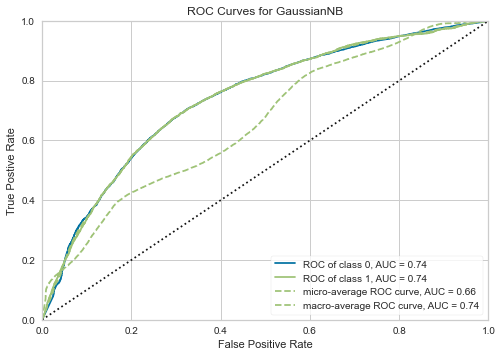

In [35]:
plot_model(nb)

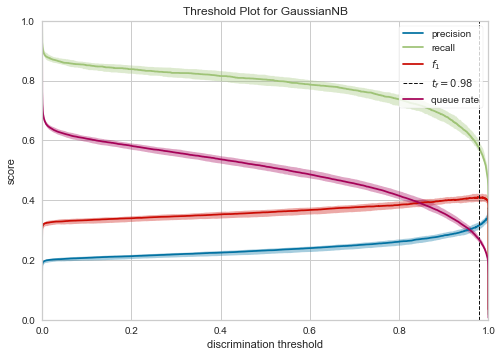

In [36]:
plot_model(nb, plot = 'threshold')

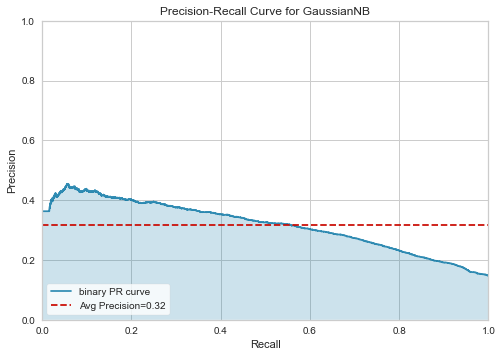

In [37]:
plot_model(nb, plot = 'pr')

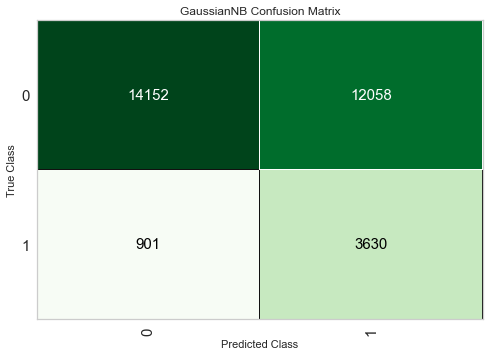

In [38]:
plot_model(nb, plot='confusion_matrix')

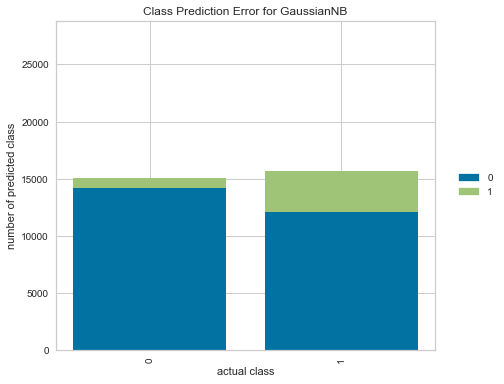

In [39]:
plot_model(nb, plot = 'error')

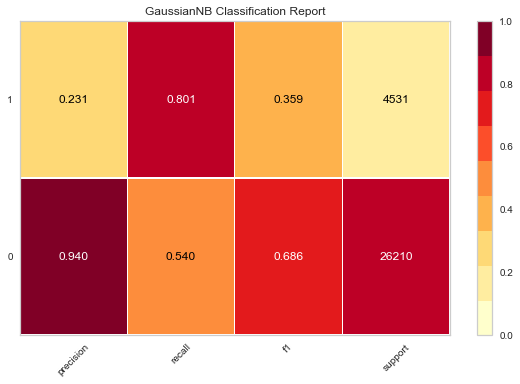

In [40]:
plot_model(nb, plot = 'class_report')

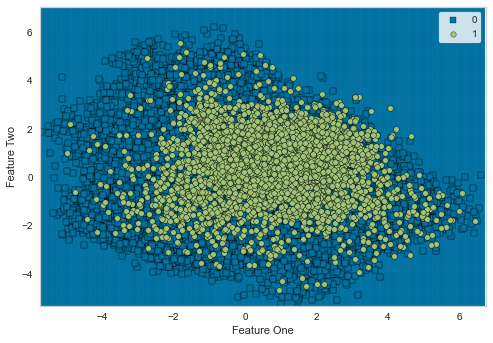

In [42]:
plot_model(nb, plot = 'boundary')

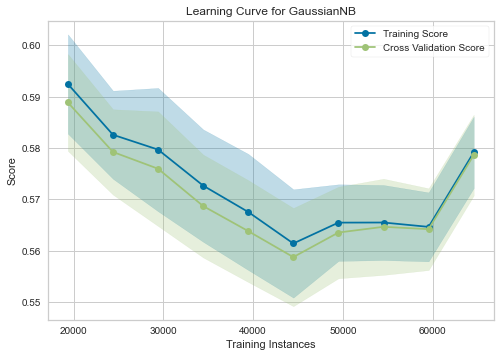

In [43]:
plot_model(nb, plot='learning')

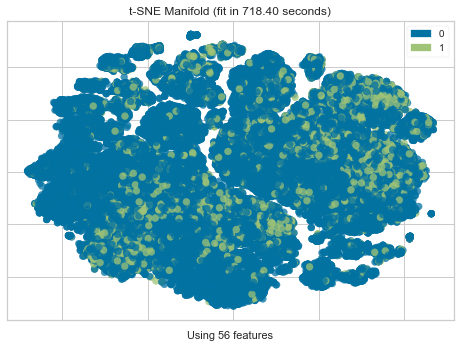

In [44]:
plot_model(nb, plot = 'manifold')

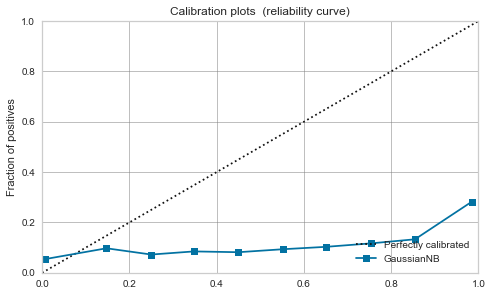

In [45]:
plot_model(nb, plot = 'calibration')

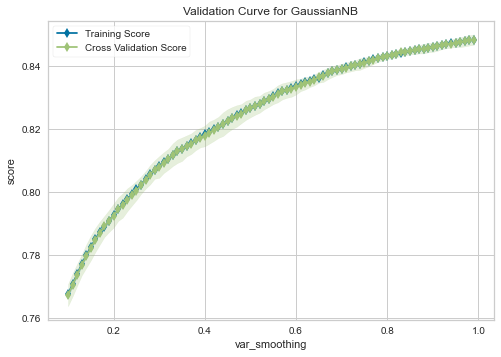

In [46]:
plot_model(nb, plot = 'vc')

In [48]:
#plot_model(nb, plot='dimension')

In [50]:
#plot_model(nb, plot = 'feature')

In [51]:
plot_model(nb, plot = 'parameter')

,Parameters
priors,NaN
var_smoothing,1.000000e-09


## Tune Model

In [53]:
tuned_nb = tune_model(nb, optimize = 'Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5160,0.7348,0.8221,0.2092,0.3336,0.1290,0.2047
1,0.5073,0.7404,0.8335,0.2078,0.3327,0.1267,0.2051
2,0.5126,0.7210,0.8061,0.2056,0.3277,0.1214,0.1923
3,0.5203,0.7383,0.8288,0.2118,0.3374,0.1341,0.2122
4,0.5059,0.7265,0.8079,0.2036,0.3252,0.1175,0.1882
5,0.5266,0.7359,0.8100,0.2115,0.3354,0.1325,0.2057
6,0.5171,0.7413,0.8270,0.2105,0.3356,0.1314,0.2087
7,0.5100,0.7303,0.8108,0.2055,0.3279,0.1212,0.1932
8,0.5138,0.7323,0.8165,0.2077,0.3311,0.1256,0.1996
9,0.5124,0.7237,0.8155,0.2070,0.3302,0.1244,0.1979


In [58]:
bagged_nb = ensemble_model(nb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5168,0.7348,0.8221,0.2095,0.3340,0.1295,0.2054
1,0.5076,0.7405,0.8335,0.2079,0.3328,0.1269,0.2053
2,0.5114,0.7208,0.8070,0.2053,0.3274,0.1208,0.1919
3,0.5192,0.7382,0.8269,0.2111,0.3363,0.1327,0.2101
4,0.5051,0.7266,0.8127,0.2040,0.3261,0.1184,0.1905
5,0.5266,0.7359,0.8110,0.2116,0.3357,0.1328,0.2062
6,0.5160,0.7409,0.8261,0.2100,0.3349,0.1303,0.2072
7,0.5113,0.7303,0.8108,0.2059,0.3284,0.1220,0.1942
8,0.5151,0.7323,0.8146,0.2078,0.3312,0.1259,0.1994
9,0.5145,0.7240,0.8108,0.2071,0.3299,0.1242,0.1967


In [60]:
boosted_nb = ensemble_model(nb, method='Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.4801,0.4494,0.3226,0.1017,0.1546,-0.0895,-0.1208
1,0.6038,0.4873,0.1580,0.0788,0.1052,-0.1139,-0.1252
2,0.1574,0.4861,0.9953,0.1484,0.2582,0.0023,0.0262
3,0.5450,0.4288,0.2308,0.0905,0.1301,-0.1035,-0.1244
4,0.2119,0.3937,0.6821,0.1194,0.2032,-0.0635,-0.1819
5,0.4497,0.4799,0.3611,0.1046,0.1622,-0.0863,-0.1233
6,0.4740,0.4508,0.2836,0.0905,0.1372,-0.1113,-0.1490
7,0.4463,0.5223,0.4778,0.1287,0.2028,-0.0383,-0.0579
8,0.7765,0.4439,0.0728,0.1100,0.0876,-0.0337,-0.0347
9,0.1804,0.3994,0.7711,0.1263,0.2171,-0.0484,-0.1776


In [67]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7110,0.7858,0.7332,0.3020,0.4278,0.2769,0.3256
1,0.7015,0.7865,0.7465,0.2964,0.4243,0.2704,0.3230
2,0.7077,0.7740,0.7162,0.2964,0.4193,0.2663,0.3127
3,0.7099,0.7824,0.7266,0.3000,0.4247,0.2730,0.3208
4,0.7039,0.7792,0.7313,0.2958,0.4213,0.2676,0.3171
5,0.7128,0.7842,0.7183,0.3013,0.4246,0.2736,0.3195
6,0.7043,0.7900,0.7439,0.2984,0.4260,0.2729,0.3246
7,0.7026,0.7728,0.7001,0.2895,0.4096,0.2541,0.2984
8,0.7076,0.7699,0.7219,0.2973,0.4212,0.2685,0.3158
9,0.7075,0.7839,0.7313,0.2988,0.4243,0.2719,0.3209


In [65]:
lda = create_model('lda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7075,0.7863,0.7398,0.3002,0.4271,0.2751,0.3256
1,0.6964,0.7863,0.7531,0.2934,0.4223,0.2668,0.3213
2,0.7024,0.7740,0.7219,0.2930,0.4168,0.2622,0.3102
3,0.7077,0.7827,0.7417,0.3006,0.4278,0.2760,0.3268
4,0.7018,0.7782,0.7493,0.2971,0.4255,0.2718,0.3249
5,0.7103,0.7852,0.7259,0.3005,0.4250,0.2734,0.3210
6,0.7011,0.7916,0.7505,0.2969,0.4255,0.2715,0.3249
7,0.6999,0.7727,0.7048,0.2882,0.4091,0.2528,0.2982
8,0.7002,0.7704,0.7209,0.2912,0.4148,0.2593,0.3075
9,0.7045,0.7845,0.7408,0.2979,0.4250,0.2719,0.3230


In [68]:
blended_top3 = blend_models(estimator_list = [nb,lda,lr], method='soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5811,0.7695,0.8117,0.2342,0.3635,0.1747,0.2503
1,0.5762,0.7710,0.8250,0.2340,0.3645,0.1752,0.2541
2,0.5752,0.7549,0.7975,0.2293,0.3562,0.1651,0.2371
3,0.5866,0.7690,0.8184,0.2378,0.3685,0.1816,0.2588
4,0.5774,0.7602,0.8051,0.2315,0.3596,0.1695,0.2434
5,0.5886,0.7666,0.8157,0.2385,0.3690,0.1824,0.2589
6,0.5795,0.7735,0.8195,0.2348,0.3651,0.1762,0.2536
7,0.5779,0.7574,0.8023,0.2313,0.3591,0.1690,0.2421
8,0.5799,0.7560,0.8051,0.2326,0.3610,0.1715,0.2454
9,0.5824,0.7628,0.8117,0.2348,0.3643,0.1758,0.2514


In [78]:
final_nb = finalize_model(nb)

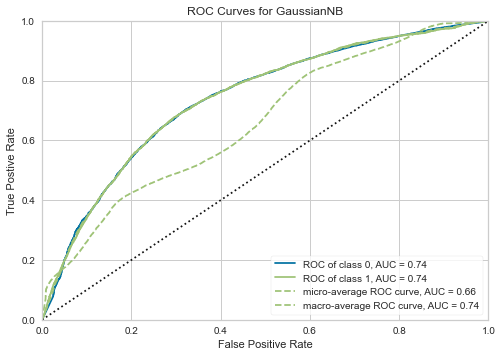

In [80]:
plot_model(final_nb)

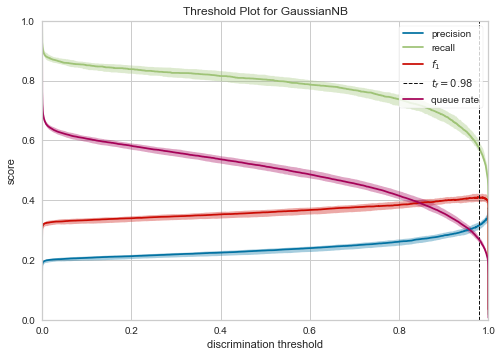

In [81]:
plot_model(final_nb, plot = 'threshold')

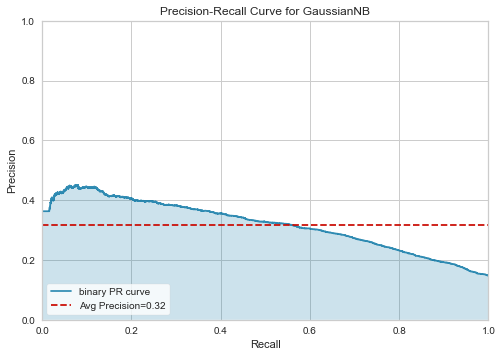

In [82]:
plot_model(final_nb, plot = 'pr')

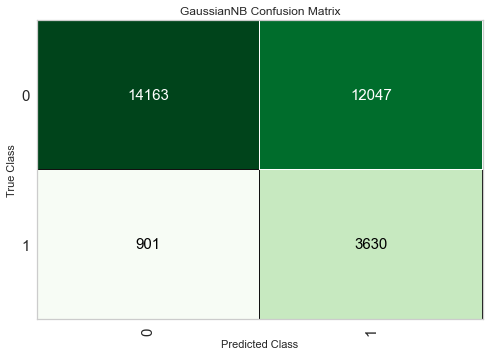

In [83]:
plot_model(final_nb, plot='confusion_matrix')

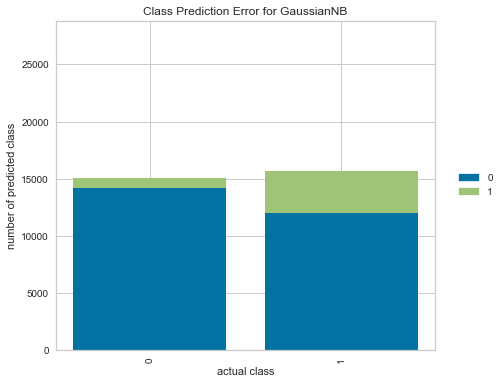

In [84]:
plot_model(final_nb, plot = 'error')

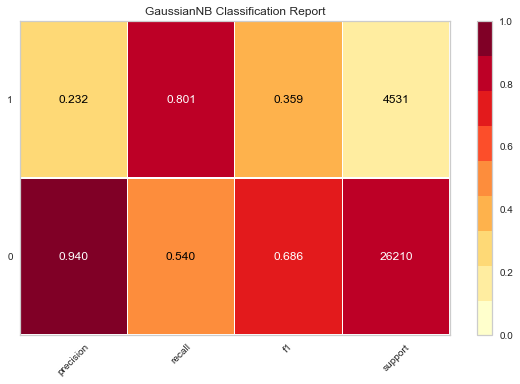

In [85]:
plot_model(final_nb, plot = 'class_report')

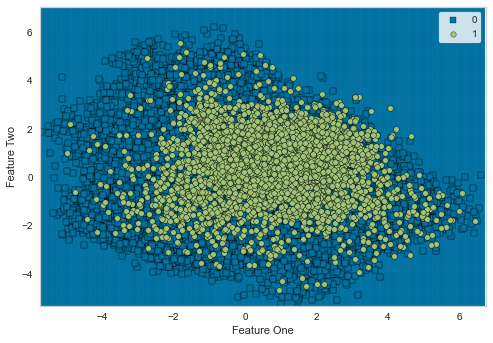

In [87]:
plot_model(final_nb, plot = 'boundary')

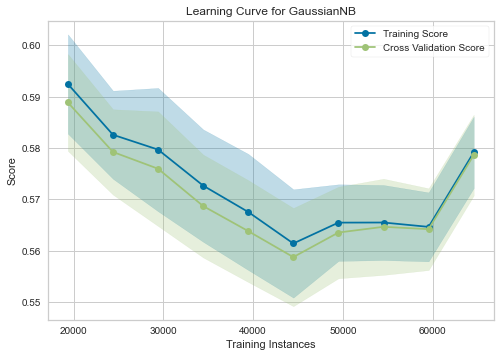

In [88]:
plot_model(final_nb, plot='learning')

In [89]:
#plot_model(final_nb, plot = 'manifold')

In [90]:
#plot_model(final_nb, plot = 'calibration')

In [91]:
#plot_model(final_nb, plot = 'vc')

In [92]:
#plot_model(final_nb, plot='dimension')

In [93]:
#plot_model(final_nb, plot = 'feature')

In [94]:
plot_model(final_nb, plot = 'parameter')

,Parameters
priors,NaN
var_smoothing,1.000000e-09


# Predict models

In [95]:
predicted_final_nb = predict_model(final_nb)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.5788,0.7402,0.8011,0.2315,0.3593,0.1693,0.2422


In [96]:
predicted_nb = predict_model(nb)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.5784,0.7391,0.8011,0.2314,0.3591,0.169,0.2419


In [97]:
predicted_nb_tuned = predict_model(tuned_nb)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.5784,0.7391,0.8011,0.2314,0.3591,0.169,0.2419


In [98]:
predicted_nb_bagged = predict_model(bagged_nb)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Bagging Classifier,0.5633,0.7384,0.8087,0.2259,0.3531,0.1594,0.234


In [99]:
predicted_blended_top3 = predict_model(blended_top3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.8048,0.762,0.4414,0.3656,0.4,0.2846,0.2864


# The golden moment... put 10% sample test data through the models...

# Recombine test_features, test_target at first train/test/split
 This "test" set was split BEFORE Oversampling. PyCaret takes the "train" from this split and splits it internally again. Since we have no control of how PyCaret does this we needed to do a train/test split before we input the training set into PyCaret. Now we will recombine the test_features and test_target into one new df

In [100]:
test_features.shape

(13317, 31)

In [101]:
test_target.shape

(13317,)

In [102]:
test_df = test_features.copy()

In [103]:
test_df['zeroBalCode'] = test_target

In [104]:
test_df.shape

(13317, 32)

In [105]:
totalTestCount = test_df.zeroBalCode.value_counts().sum()
posTestCount = test_df.zeroBalCode.value_counts()[1]
print('#############################################')
print('This "Test" set has not been oversamplied')
print(test_df.zeroBalCode.value_counts())
print(f'Positive samples are {round(posTestCount/totalTestCount*100,2)}%')

#############################################
This "Test" set has not been oversamplied
0    11410
1     1907
Name: zeroBalCode, dtype: int64
Positive samples are 14.32%


## Create Confusion Matrix output functions

In [106]:
def calc_confusion(row):
    if ((row['zeroBalCode'] == 0) & (row['Label'] == 0)):
        value = 'TrueNegative'
    elif ((row['zeroBalCode'] == 0) & (row['Label'] == 1)):
        value = 'FalsePositive'
    elif ((row['zeroBalCode'] == 1) & (row['Label'] == 1)):
        value = 'TruePositive'
    elif ((row['zeroBalCode'] == 1) & (row['Label'] == 0)):
        value = 'FalseNegative'
    else:
        value = 'Undefined'
    return value

In [107]:
def cM(df):
    print(f'           ##############################')
    print(f'           #             #              #')
    print(f'         0 #    {df["TrueNegative"]}     #     {df["FalsePositive"]}      #')
    print(f'  True     #             #              #')
    print(f'  Class    ##############################')
    print(f'           #             #              #')
    print(f'         1 #    {df["FalseNegative"]}      #     {df["TruePositive"]}      #')
    print(f'           #             #              #')
    print(f'           ##############################')
    print(f'                  0              1        ')
    print(f'                  Predicted Class           ')


In [108]:
def cMCalc():
    # 0 or 2 = Predict equals truth, 1 = Predict doesn't equal truth
    totalNegative = confusionMatrix['TrueNegative'] + confusionMatrix['FalseNegative']
    totalPositive = confusionMatrix['TruePositive'] + confusionMatrix['FalsePositive']
    total = totalNegative + totalPositive
    trueNegativePct = confusionMatrix['TrueNegative'] / total * 100
    falseNegativePct = confusionMatrix['FalseNegative'] / total * 100
    truePositivePct = confusionMatrix['TruePositive'] / total * 100
    falsePositivePct = confusionMatrix['FalsePositive'] / total * 100

    # Accuracy Calculation
    accuracy = (confusionMatrix['TruePositive'] + confusionMatrix['TrueNegative'])/(totalPositive + totalNegative)
    # Recall Calculation
    recall = (confusionMatrix['TruePositive']/(confusionMatrix['TruePositive'] + confusionMatrix['FalseNegative']))
    # Precision Calculation
    precision = (confusionMatrix['TruePositive']/(confusionMatrix['TruePositive'] + confusionMatrix['FalsePositive']))

    print(f'TrueNegative:  {round(trueNegativePct,2)}%')
    print(f'FalseNegative:  {round(falseNegativePct,2)}%')
    print(f'TruePositive:   {round(truePositivePct,2)}%')
    print(f'FalsePositive: {round(falsePositivePct,2)}%')
    print(f'#####################################################')
    print(f'Accuracy: {round(accuracy,2)*100}%   Recall: {round(recall,2)*100}%   Precision: {round(precision,2)*100}%')
    print(f'#####################################################')

# Evaluate Models

In [109]:
predictions = predict_model(final_nb, data=test_df)

In [110]:
pd.set_option('max_columns',None)
predictions.head()

,origChannel,sellerName,origIntRate,origUPB,origLoanTerm,origLTV,origCLTV,numBorrowers,origDebtIncRatio,loanPurp,propState,zipCode,pMIperct,mortInsType,bestCreditScore,worstCreditScore,avgCreditScore,loanAge,mSA,fmacRateMax,fmacRateMin,fmacRateAvg,fmacRateVolatility,rateDiffAbove,rateDiffBelow,rateDiffAvg,rateDiffAbovePct,rateDiffBelowPct,rateDiffAvgPct,origYear,origMonth,zeroBalCode,Label,Score
0,B,QUICKEN LOANS INC.,3.750,467000,360,43,43,2,45,R,CA,949,0.0,0,822,793,807,81,41860,3.53,3.34,3.414,0.056886,0.220,-0.410,0.336,0.062323,-0.122754,0.098418,2013,1,0,0,0.0001
1,R,OTHER,3.750,74000,360,94,100,1,32,P,OH,458,25.0,1,759,759,759,27,0,3.64,3.57,3.600,0.019608,0.110,-0.180,0.150,0.030220,-0.050420,0.041667,2016,5,0,0,0.0252
2,B,"BANK OF AMERICA, N.A.",5.875,108000,360,80,80,1,23,C,WI,531,0.0,0,658,658,658,143,0,5.63,5.53,5.582,0.018083,0.245,-0.345,0.293,0.043517,-0.062387,0.052490,2005,6,0,1,0.7610
3,C,"WELLS FARGO BANK, N.A.",5.625,275000,240,72,72,2,34,C,NJ,87,0.0,0,743,743,743,163,35620,6.15,5.98,6.065,0.028428,-0.525,0.355,-0.440,-0.085366,0.059365,-0.072547,2005,10,0,0,0.4331
4,R,"BANK OF AMERICA, N.A.",5.625,157000,360,69,69,2,28,R,CA,933,0.0,0,667,619,643,120,12540,5.26,5.21,5.230,0.009597,0.365,-0.415,0.395,0.069392,-0.079655,0.075526,2003,6,0,0,0.2553


In [111]:
results = predictions[['zeroBalCode','Label','Score']]

In [112]:
predictions.Label.value_counts()

0    7254
1    6063
Name: Label, dtype: int64

In [113]:
results['Confusion'] = results.apply(calc_confusion, axis=1)

In [114]:
confusionMatrix = results.Confusion.value_counts().to_dict()

In [115]:
cM(confusionMatrix)

           ##############################
           #             #              #
         0 #    6738     #     4672      #
  True     #             #              #
  Class    ##############################
           #             #              #
         1 #    516      #     1391      #
           #             #              #
           ##############################
                  0              1        
                  Predicted Class           


In [116]:
cMCalc()

TrueNegative:  50.6%
FalseNegative:  3.87%
TruePositive:   10.45%
FalsePositive: 35.08%
#####################################################
Accuracy: 61.0%   Recall: 73.0%   Precision: 23.0%
#####################################################


In [117]:
pred_holdout = predict_model(final_nb)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.5788,0.7402,0.8011,0.2315,0.3593,0.1693,0.2422


In [118]:
save_model(final_nb, 'np.final5pct_092020')

Transformation Pipeline and Model Succesfully Saved
